In [50]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go

## Data Preprocessing

### We are doing the following things in preprocessing:
- Formatting of index column as pandas datetime (time stamps)
- Removing unnecessary columns from the dataframe
- Creating a new dataframe which contains only numerical values (df_num)
- Checking and removing any nan values

In [51]:
# Reading the data
df = pd.read_csv('Steel_industry_data.csv')
df.drop(columns=['NSM'], inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh', 'CO2(tCO2)' : 'CO2'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df.dropna(inplace=True)
df.set_index('date', inplace=True)
display(df)

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,Weekday,Monday,Light_Load
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,Weekday,Monday,Light_Load
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,Weekday,Monday,Light_Load
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,Weekday,Monday,Light_Load
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,Weekday,Monday,Light_Load
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,Weekday,Monday,Light_Load
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,Weekday,Monday,Light_Load


In [52]:
# Displaying the dataframe that contains only numerical values
df_num = df.select_dtypes(include=['number'])
display(df_num)

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00
...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98


# Checking Normality

### Checking normality for each column using univariate qq plot    

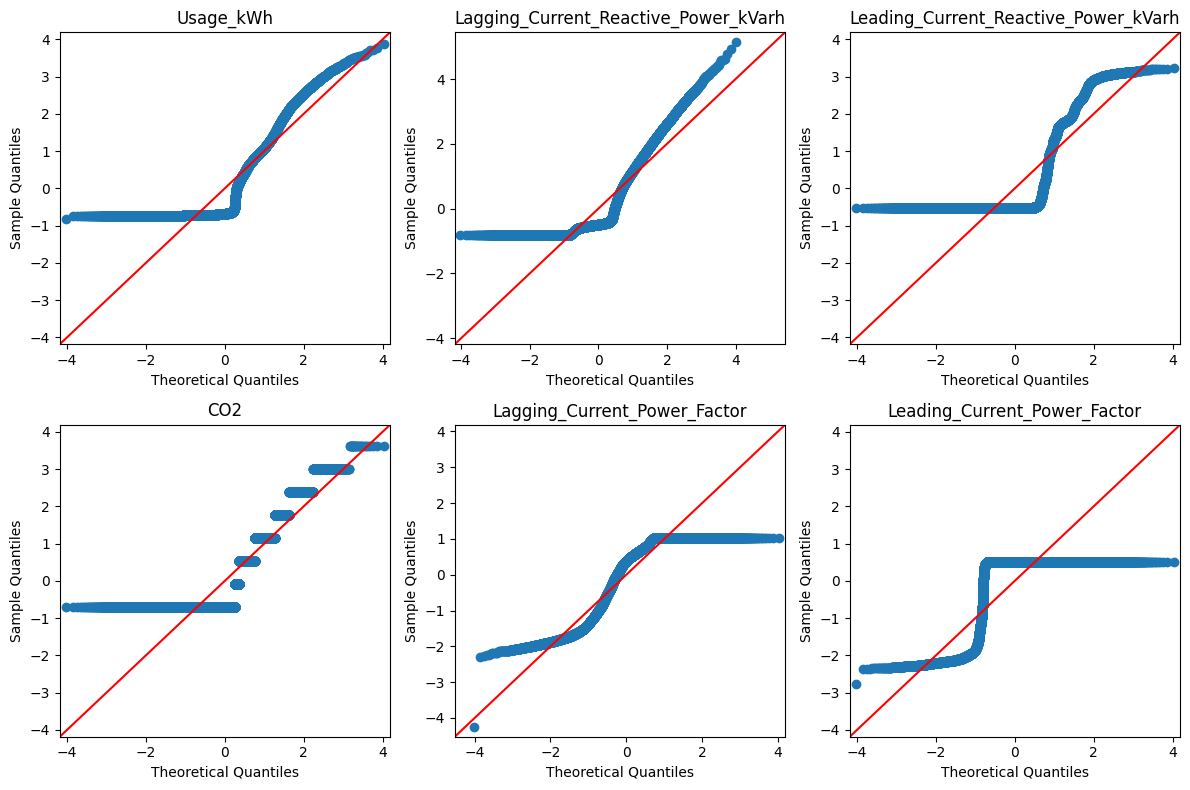

In [53]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set up a 2x3 grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over the columns and the corresponding axes
for i, col in enumerate(df_num.columns):
    row, col_idx = divmod(i, 3)  # Determine row and column in the grid
    sm.qqplot(df_num[col], line='45', fit=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Remarks
- We can observe formation of flat lines in most of the plots.
- This could be due to the fact that the production being very less in night or some anomaly similar to this.
- We'll try to overcome this by resampling the data to daily level

In [54]:
# Resampling the data to daily level as the original data does not look normal
df_num_daily = df_num.resample('D').mean()
df_num_daily 

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
2018-01-01,3.665208,1.735625,9.885000,0.000000,85.299375,57.076146
2018-01-02,41.150312,16.454479,3.063125,0.000000,84.207292,92.138125
2018-01-03,37.094271,13.391562,2.766562,0.015938,86.100000,92.617292
2018-01-04,51.851250,21.449063,2.339271,0.022604,84.128125,93.423750
2018-01-05,48.785417,20.422917,2.689167,0.021250,84.063021,92.862813
...,...,...,...,...,...,...
2018-12-27,27.227812,9.291250,2.440313,0.011146,89.655625,93.456667
2018-12-28,19.151875,6.244896,5.999062,0.007500,91.931562,81.060833
2018-12-29,3.931458,1.250417,9.224375,0.000104,90.275417,57.799271


In [55]:
# normalize df_num_daily
df_num_daily = (df_num_daily - df_num_daily.mean())/df_num_daily.std()
df_num_daily

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
2018-01-01,-1.538524,-1.520027,2.135493,-1.563939,0.853128,-1.953859
2018-01-02,0.892658,0.459932,-0.286845,-1.563939,0.655792,0.556285
2018-01-03,0.629594,0.047913,-0.392150,0.598914,0.997799,0.590590
2018-01-04,1.586691,1.131795,-0.543874,1.503637,0.641487,0.648325
2018-01-05,1.387850,0.993760,-0.419632,1.319865,0.629723,0.608167
...,...,...,...,...,...,...
2018-12-27,-0.010317,-0.503655,-0.507996,-0.051355,1.640289,0.650682
2018-12-28,-0.534101,-0.913446,0.755659,-0.546126,2.051544,-0.236756
2018-12-29,-1.521255,-1.585296,1.900915,-1.549802,1.752284,-1.902089


### Univarite qq plots for resampled daily data

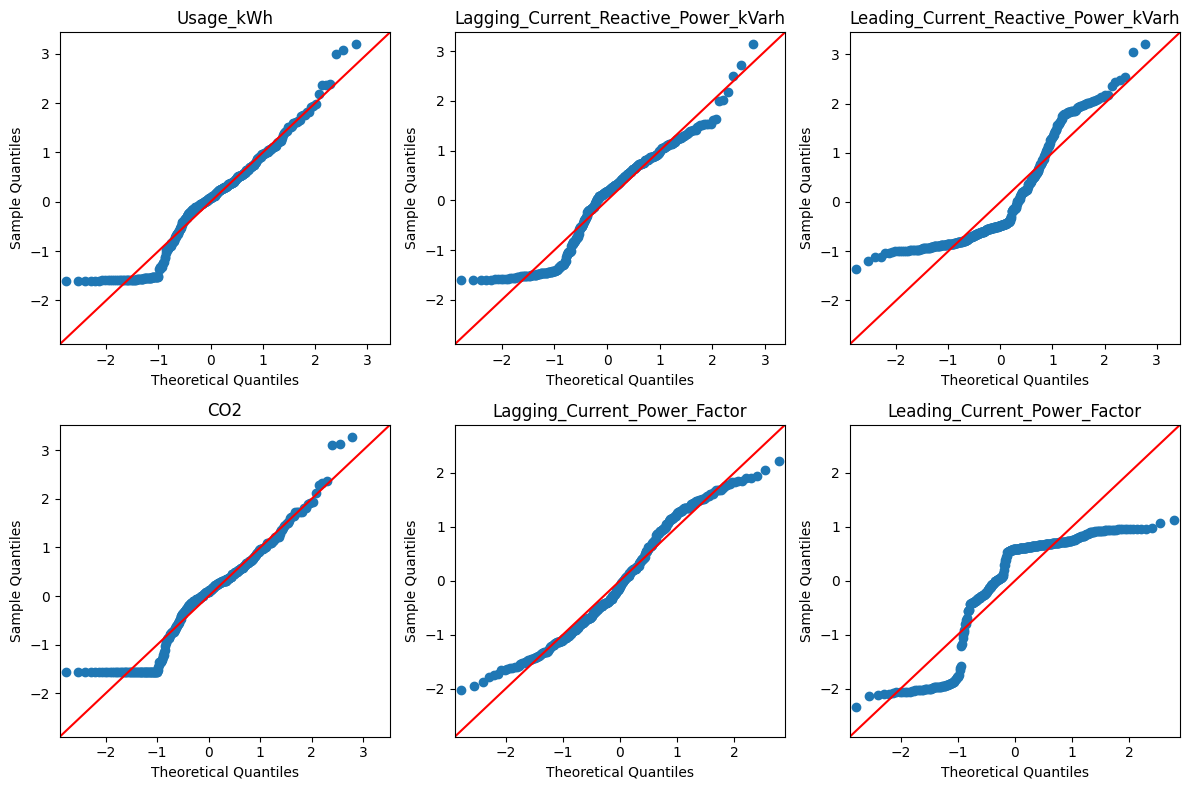

In [56]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set up a 2x3 grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over the columns and corresponding axes
for i, col in enumerate(df_num_daily.columns):
    row, col_idx = divmod(i, 3)  # Determine row and column in the grid
    sm.qqplot(df_num_daily[col], line='45', fit=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


### The components seem more normal after resampling at daily level

# Checking multivariate normality

### Plotting mahalanobis distance with corresponding quantiles in chi square distribution 

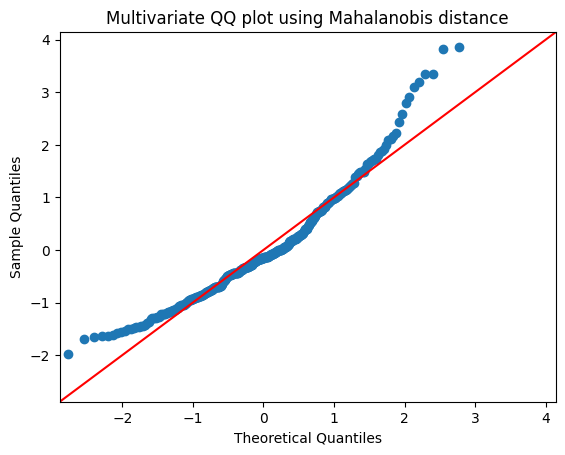

In [57]:
# multivariate qq pplot using mahalanobis distance
from scipy.spatial.distance import mahalanobis
# calculate the mahalanobis distance
dist = []
for i in list(range(0, 1)) + list(range(2, len(df_num_daily))):
    dist.append(mahalanobis(df_num_daily.iloc[i], np.zeros(6), np.linalg.inv(np.cov(df_num_daily.T))))
dist = np.array(dist)

# # remove max element from dist
dist = np.delete(dist, np.array(dist).argmax())

# plot the qq plot
sm.qqplot(dist, line ='45', fit = True)
plt.title('Multivariate QQ plot using Mahalanobis distance')
plt.show()

### The data looks normal in the middle, but we can also observe some outliers at the extremities of the plot
### This could be due to the small number of data points (only 365 data points in our case) or anomalies in the data itself

# Visualizing data

In [58]:
def plot_correlation_matrix(df, width=800, height=800):
    """
    Create a correlation matrix heatmap using plotly with red-green color scheme.
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    width (int): Width of the plot in pixels
    height (int): Height of the plot in pixels
    
    Returns:
    plotly.graph_objects.Figure: Correlation matrix plot
    """
    # Calculate correlation matrix
    corr_matrix = df.corr()
    
    # Create custom color scale (red for negative, green for positive)
    colors = [[0, 'red'],
              [0.5, 'white'],
              [1, 'green']]
    
    # Create heatmap
    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        zmin=-1,
        zmax=1,
        colorscale=colors,
        text=np.round(corr_matrix, 2),  # Round to 2 decimal places
        texttemplate='%{text}',  # Show the text for all cells
        textfont={"size": 10},
        hoverongaps=False,
        hovertemplate='%{x} vs %{y}<br>Correlation: %{z:.2f}<extra></extra>'
    ))
    
    # Update layout
    fig.update_layout(
        width=width,
        height=height,
        title='Correlation Matrix',
        xaxis_title='Features',
        yaxis_title='Features',
        xaxis={'side': 'bottom'},
        yaxis={'side': 'left'},
    )
    
    return fig

In [59]:
# Correlation matrix
plot_correlation_matrix(df_num_daily, width=800, height=600)

In [60]:
px.line(df_num_daily['Usage_kWh'], labels={'index':'Date', 'value':'Usage_kWh'}, title='Usage Data Overview')

In [61]:
# plotly monthly average values against month of df_num
import plotly.express as px

df_temp = df_num.copy()

df_temp = df_temp.groupby(df_temp.index.month).mean()

px.line(df_temp, labels={'value':'Average value', 'index':'Month'}, title='Monthly average values of df_num')

## Divide the data into 2 populations

In [62]:
# divide the data into winter and summer
df_summer = df_num_daily[df_num_daily.index.quarter.isin([2,3])]
df_winter = df_num_daily[df_num_daily.index.quarter.isin([1,4])]
display(df_summer.describe())
display(df_winter.describe())

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,-0.183785,-0.090859,-0.003359,-0.163133,-0.464142,-0.077183
std,0.838793,0.896120,0.893887,0.830893,0.640307,0.969523
min,-1.600949,-1.586389,-1.031338,-1.563939,-1.877203,-2.342087
25%,-0.836565,-0.941513,-0.645017,-0.765238,-0.937306,-0.408405
50%,-0.023174,0.133402,-0.458950,0.005190,-0.481827,0.541989
75%,0.388801,0.611132,0.546529,0.393938,0.019908,0.626587
max,1.513004,1.514360,2.161976,1.461228,1.192820,0.903602


,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.184795,0.091359,0.003377,0.164029,0.466692,0.077607
std,1.111351,1.089423,1.098899,1.123785,1.077951,1.026549
min,-1.597726,-1.593563,-1.362786,-1.563939,-2.024772,-2.092374
25%,-0.549557,-0.878443,-0.847933,-0.595603,-0.407238,-0.263459
50%,0.268535,0.209503,-0.509401,0.259643,0.824414,0.649504
75%,0.905112,0.878967,0.549812,0.892242,1.346563,0.759699
max,3.191990,3.137130,3.213357,3.270673,2.215414,1.119070


## Test for Equivalence of Variance

In [64]:
import numpy as np
from scipy.stats import chi2

def wilks_lambda_test(df_summer, df_winter, alpha=0.05):
    """
    Performs Wilks' Lambda test to compare covariance matrices between two groups
    using the formula: -2log∧ = -np log(n) + n log(|A|) + Σ ni_p log(ni) + Σ ni log(|Ai|)
    
    Parameters:
    df_summer (pandas.DataFrame): Data frame containing summer measurements
    df_winter (pandas.DataFrame): Data frame containing winter measurements
    alpha (float): Significance level for the test
    
    Returns:
    dict: Test statistics and results
    """
    # Calculate sample sizes
    n1 = len(df_summer)
    n2 = len(df_winter)
    n = n1 + n2  # total sample size
    
    # Number of variables
    p = len(df_summer.columns)
    
    # Calculate individual covariance matrices and their determinants
    A1 = (n1 - 1) * np.cov(df_summer.T)  # As per formula Ai = (ni-1)cov
    A2 = (n2 - 1) * np.cov(df_winter.T)
    
    # Calculate |A| (determinant of sum of matrices)
    A = A1 + A2
    det_A = np.linalg.det(A)
    det_A1 = np.linalg.det(A1)
    det_A2 = np.linalg.det(A2)
    
    # Calculate Wilks' Lambda statistic using the formula from the image
    wilks_stat = -n * p * np.log(n) + \
                 n * np.log(det_A) + \
                 n1 * p * np.log(n1) + \
                 n2 * p * np.log(n2) - \
                 n1 * np.log(det_A1) - \
                 n2 * np.log(det_A2)

    # Degrees of freedom calculation as shown in image
    # (g-1)p(p+1)/2 where g=2 (number of groups)
    df = (2-1) * p * (p+1) / 2
    
    # Calculate p-value using chi-square distribution
    p_value = 1 - chi2.cdf(wilks_stat, df)
    
    # Calculate critical value
    chi2_critical = chi2.ppf(1 - alpha, df)
    
    results = {
        'wilks_lambda_stat': wilks_stat,
        'degrees_of_freedom': df,
        'chi2_critical': chi2_critical,
        'p_value': p_value,
        'equal_covariance': p_value > alpha
    }
    
    return results

def print_wilks_test_results(results):
    """
    Pretty prints the results of the Wilks' Lambda test
    """
    print("\nWilks' Lambda Test Results:")
    print("-" * 40)
    print(f"Test statistic (-2 log Λ): {results['wilks_lambda_stat']:.4f}")
    print(f"Degrees of freedom: {results['degrees_of_freedom']:.0f}")
    print(f"Critical value (χ²): {results['chi2_critical']:.4f}")
    print(f"P-value: {results['p_value']:.4f}")
    print("\nConclusion:")
    if results['equal_covariance']:
        print("Fail to reject null hypothesis: Covariance matrices are not significantly different")
    else:
        print("Reject null hypothesis: Covariance matrices are significantly different")

## Test for Equivalence of Mean

In [63]:
# test for multivariate equivalence of mean in summer and winter
# Hotelling's T-squared test
from scipy.stats import f
from scipy.stats import t

# calculate the mean of the two groups
mean_summer = df_summer.mean()
mean_winter = df_winter.mean()

# calculate the covariance matrix of the two groups
cov_summer = np.cov(df_summer.T)
cov_winter = np.cov(df_winter.T)

# calculate the number of samples in each group
n_summer = len(df_summer)
n_winter = len(df_winter)

# calculate the number of variables
p = len(df_summer.columns)

# calculate the pooled covariance matrix
cov_pooled = ((n_summer - 1)*cov_summer + (n_winter - 1)*cov_winter)/(n_summer + n_winter - 2)

# calculate the T-squared statistic
hotelling = n_summer*n_winter/(n_summer + n_winter)*np.dot(np.dot(mean_summer - mean_winter, np.linalg.inv(cov_pooled)), mean_summer - mean_winter)

# calculate the F-statistic
f_statistic = hotelling*(n_summer + n_winter - p - 1)/(p*(n_summer + n_winter - 2))

# calculate the critical value of the F-statistic
alpha = 0.05

f_critical = f.ppf(1 - alpha, p, n_summer + n_winter - p - 1)

# calculate the p-value
p_value = 1 - f.cdf(f_statistic, p, n_summer + n_winter - p - 1)

print('Hotelling T-squared statistic:', hotelling)
print('F-statistic:', f_statistic)
print('Critical value of F-statistic:', f_critical)
print('P-value:', p_value)

if f_statistic > f_critical:
    print('Reject the null hypothesis that the means are equal')
else:
    print('Fail to reject the null hypothesis that the means are equal')

Hotelling T-squared statistic: 138.07169032050388
F-statistic: 22.69497940070725
Critical value of F-statistic: 2.1239225395551817
P-value: 1.1102230246251565e-16
Reject the null hypothesis that the means are equal


In [65]:
print_wilks_test_results(wilks_lambda_test(df_summer, df_winter))


Wilks' Lambda Test Results:
----------------------------------------
Test statistic (-2 log Λ): 544.7142
Degrees of freedom: 21
Critical value (χ²): 32.6706
P-value: 0.0000

Conclusion:
Reject null hypothesis: Covariance matrices are significantly different


# MANOVA
### Please note that MANOVA:
- The dependent variables are all the columns of the original dataframe (without the dummy variables for summer, winter)
- The independent variable is the season (summer, winter)

In [66]:
import pandas as pd
import numpy as np
from scipy import stats

def perform_manova(df_summer, df_winter):
    """
    Perform MANOVA analysis on two groups of multivariate data using Wilk's test.
    
    Parameters:
    df_summer (pd.DataFrame): DataFrame containing summer measurements
    df_winter (pd.DataFrame): DataFrame containing winter measurements
    
    Returns:
    dict: Dictionary containing test statistics and p-value
    """
    # Convert DataFrames to numpy arrays for statistical processing
    summer_data = df_summer.values
    winter_data = df_winter.values
    
    # Combine the data and create group labels
    X = np.vstack([summer_data, winter_data])
    groups = np.repeat([0, 1], [len(summer_data), len(winter_data)])
    
    # Calculate the number of variables
    n_vars = X.shape[1]
    
    # Calculate group means
    summer_mean = np.mean(summer_data, axis=0)
    winter_mean = np.mean(winter_data, axis=0)
    grand_mean = np.mean(X, axis=0)
    
    # Calculate Within-group Sum of Squares and Cross-products (W)
    W = np.zeros((n_vars, n_vars))
    for i in range(len(groups)):
        if groups[i] == 0:
            diff = X[i] - summer_mean
        else:
            diff = X[i] - winter_mean
        W += np.outer(diff, diff)
    
    # Calculate Between-group Sum of Squares and Cross-products (B)
    B = np.zeros((n_vars, n_vars))
    for mean, size in [(summer_mean, len(summer_data)), (winter_mean, len(winter_data))]:
        diff = mean - grand_mean
        B += size * np.outer(diff, diff)
    
    # Calculate Wilk's lambda statistic
    _, W_det = np.linalg.slogdet(W)
    _, T_det = np.linalg.slogdet(W + B)
    wilks_lambda = np.exp(W_det - T_det)
    
    # Calculate degrees of freedom
    df1 = 1
    df2 = len(X) - 2
    
    # Calculate F-statistic
    F = ((1 - wilks_lambda) / wilks_lambda) * (df2 / df1)
    
    # Calculate p-value
    p_value = 1 - stats.f.cdf(F, df1, df2)
    
    # Create summary statistics
    results = {
        'wilks_lambda': wilks_lambda,
        'F_statistic': F,
        'df1': df1,
        'df2': df2,
        'p_value': p_value,
        'group_sizes': {
            'summer': len(summer_data),
            'winter': len(winter_data)
        },
        'group_means': {
            'summer': summer_mean,
            'winter': winter_mean
        }
    }
    
    return results

def print_manova_results(results):
    """
    Print MANOVA results in a formatted way.
    
    Parameters:
    results (dict): Dictionary containing MANOVA results
    """
    print("\nMANOVA Results:")
    print("-" * 50)
    print(f"Wilk's Lambda: {results['wilks_lambda']:.4f}")
    print(f"F-statistic: {results['F_statistic']:.4f}")
    print(f"Degrees of freedom: ({results['df1']}, {results['df2']})")
    print(f"p-value: {results['p_value']:.4f}")
    print("\nGroup Sizes:")
    print(f"Summer: {results['group_sizes']['summer']}")
    print(f"Winter: {results['group_sizes']['winter']}")
    
    print("\nGroup Means:")
    print("\nSummer:")
    for i, mean in enumerate(results['group_means']['summer']):
        print(f"Variable {i+1}: {mean:.4f}")
    print("\nWinter:")
    for i, mean in enumerate(results['group_means']['winter']):
        print(f"Variable {i+1}: {mean:.4f}")

In [67]:
print_manova_results(perform_manova(df_summer, df_winter))


MANOVA Results:
--------------------------------------------------
Wilk's Lambda: 0.7244
F-statistic: 138.0717
Degrees of freedom: (1, 363)
p-value: 0.0000

Group Sizes:
Summer: 183
Winter: 182

Group Means:

Summer:
Variable 1: -0.1838
Variable 2: -0.0909
Variable 3: -0.0034
Variable 4: -0.1631
Variable 5: -0.4641
Variable 6: -0.0772

Winter:
Variable 1: 0.1848
Variable 2: 0.0914
Variable 3: 0.0034
Variable 4: 0.1640
Variable 5: 0.4667
Variable 6: 0.0776


# Profile Analysis

### Creating a new split in data by breaking it into am vs pm data resampled at monthly level, now we will apply the profile analysis 

In [68]:
# Profile Analysis
# from df_num make a df for mean of each column for time in AM for each month
df_am = df_num[df_num.index.hour < 12]
df_am = df_am.resample('ME').mean()
# make index month
df_am.index = df_am.index.month
display(df_am)

df_pm = df_num[df_num.index.hour >= 12]
df_pm = df_pm.resample('ME').mean()
# make index month
df_pm.index = df_pm.index.month
display(df_pm)

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
1,33.076694,17.841909,0.839328,0.014026,79.109368,97.262601
2,24.529509,13.072820,1.364881,0.009807,78.112574,94.261079
3,20.723011,11.110531,0.628784,0.008293,73.578031,97.945316
4,20.885146,12.030375,0.434007,0.008479,70.749819,98.135444
5,19.399489,12.644046,0.841526,0.007809,66.808817,96.515739
6,16.946118,11.604715,0.721139,0.006743,63.403187,96.742354
7,20.478810,13.589409,0.622655,0.008461,68.492910,94.601411
8,17.871324,12.893649,1.014940,0.007144,61.096949,94.759839
9,14.992854,10.832264,0.757965,0.005965,60.264139,95.331125


,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
1,51.760867,18.758353,7.007319,0.022258,93.611169,78.655974
2,43.548869,13.633504,7.358110,0.019390,94.957798,73.978103
3,33.195276,10.407265,7.947776,0.014315,93.114671,74.484456
4,33.816104,12.093465,7.962542,0.014681,92.296368,72.635167
5,33.731747,13.183138,7.736774,0.014711,91.455376,70.703891
6,28.473771,11.238271,7.881708,0.012076,91.209188,68.296826
7,34.409906,13.074570,6.008992,0.015074,92.436841,75.057870
8,28.203562,12.780867,6.451304,0.011969,89.658891,68.730450
9,25.203722,12.221000,5.920750,0.010646,88.177632,67.946028


In [69]:
def profile_analysis(df_am, df_pm):
    """
    Perform profile analysis tests on two populations.
    
    Parameters:
    df_am, df_pm: pandas DataFrames containing the multivariate observations
                 for the two populations
    
    Returns:
    dict: Results of the three profile analysis tests
    """
    # Convert DataFrames to numpy arrays for easier manipulation
    X1 = df_am.values
    X2 = df_pm.values
    
    # Sample sizes
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    
    # Number of variables (p)
    p = X1.shape[1]
    
    # Calculate means
    X1_bar = np.mean(X1, axis=0)
    X2_bar = np.mean(X2, axis=0)
    
    # 1. Test for Parallel Profiles
    # Construct contrast matrix C
    C = np.zeros((p-1, p))
    for i in range(p-1):
        C[i, i] = -1
        C[i, i+1] = 1
    
    # Calculate pooled covariance matrix
    S_pooled = ((n1-1)*np.cov(X1, rowvar=False) + (n2-1)*np.cov(X2, rowvar=False))/(n1+n2-2)
    
    # Calculate T² statistic for parallel profiles
    diff = X1_bar - X2_bar
    C_diff = C @ diff
    CS_pooled_C = C @ S_pooled @ C.T
    T2_parallel = n1*n2/(n1+n2) * C_diff.T @ np.linalg.inv(CS_pooled_C) @ C_diff
    
    # Critical value for parallel test
    df1 = p-1
    df2 = n1+n2-p
    F_critical_parallel = stats.f.ppf(0.95, df1, df2)
    c2_parallel = (n1+n2-2)*(p-1)/(n1+n2-p) * F_critical_parallel
    
    # 2. Test for Coincident Profiles (given parallel)
    # Sum of observations
    sum1 = np.sum(X1_bar)
    sum2 = np.sum(X2_bar)
    
    # Calculate pooled variance of sums
    S_pooled_sums = np.sum(S_pooled)
    
    # T² statistic for coincident profiles
    T2_coincident = (n1*n2/(n1+n2)) * ((sum1-sum2)**2)/(p**2 * S_pooled_sums)
    
    # Critical value for coincident test
    F_critical_coincident = stats.f.ppf(0.95, 1, n1+n2-2)
    
    # 3. Test for Level Profiles (given coincident)
    # Calculate overall mean
    X_bar = (n1*X1_bar + n2*X2_bar)/(n1+n2)
    
    # Calculate test statistic for level profiles
    S = ((n1-1)*np.cov(X1, rowvar=False) + (n2-1)*np.cov(X2, rowvar=False))/(n1+n2-1)
    T2_level = (n1+n2) * X_bar.T @ C.T @ np.linalg.inv(C @ S @ C.T) @ C @ X_bar
    
    # Critical value for level test
    df1_level = p-1
    df2_level = n1+n2-p+1
    F_critical_level = stats.f.ppf(0.95, df1_level, df2_level)
    c2_level = (n1+n2-1)*(p-1)/(n1+n2-p+1) * F_critical_level
    
    results = {
        'parallel': {
            'T2': T2_parallel,
            'critical_value': c2_parallel,
            'reject_H0': T2_parallel > c2_parallel
        },
        'coincident': {
            'T2': T2_coincident,
            'critical_value': F_critical_coincident,
            'reject_H0': T2_coincident > F_critical_coincident
        },
        'level': {
            'T2': T2_level,
            'critical_value': c2_level,
            'reject_H0': T2_level > c2_level
        }
    }

    print(results)
    
    return results

In [70]:
profile_analysis(df_am, df_pm)

{'parallel': {'T2': 848.5632998395693, 'critical_value': 16.945213712764513, 'reject_H0': True}, 'coincident': {'T2': 0.3095975370281838, 'critical_value': 4.300949501777657, 'reject_H0': False}, 'level': {'T2': 137245.36148767953, 'critical_value': 16.58455880493761, 'reject_H0': True}}


{'parallel': {'T2': 848.5632998395693,
  'critical_value': 16.945213712764513,
  'reject_H0': True},
 'coincident': {'T2': 0.3095975370281838,
  'critical_value': 4.300949501777657,
  'reject_H0': False},
 'level': {'T2': 137245.36148767953,
  'critical_value': 16.58455880493761,
  'reject_H0': True}}

## PCA

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca_analysis(data, n_components=None):
    """
    Perform PCA on the input data and create a scree plot
    
    Parameters:
    data (numpy.ndarray): Input data matrix (samples × features)
    n_components (int): Number of components to keep (default: None, keeps all components)
    
    Returns:
    tuple: (pca_object, transformed_data, explained_variance_ratio)
    """
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    data_transformed = pca.fit_transform(data_scaled)
    
    # Calculate cumulative explained variance
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Create scree plot
    plt.figure(figsize=(10, 6))
    
    # line plot of explained variance ratio
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_,
             marker='o',
             label='Individual explained variance')
    # plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
    #         pca.explained_variance_ratio_,
    #         alpha=0.5,
    #         align='center',
    #         label='Individual explained variance')
    
    # Line plot of cumulative explained variance ratio
    plt.step(range(1, len(cumulative_variance_ratio) + 1),
             cumulative_variance_ratio,
             where='mid',
             label='Cumulative explained variance')
    
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Add percentage labels on top of each bar
    for i, v in enumerate(pca.explained_variance_ratio_):
        plt.text(i + 1, v, f'{v:.1%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return pca, data_transformed, pca.explained_variance_ratio_

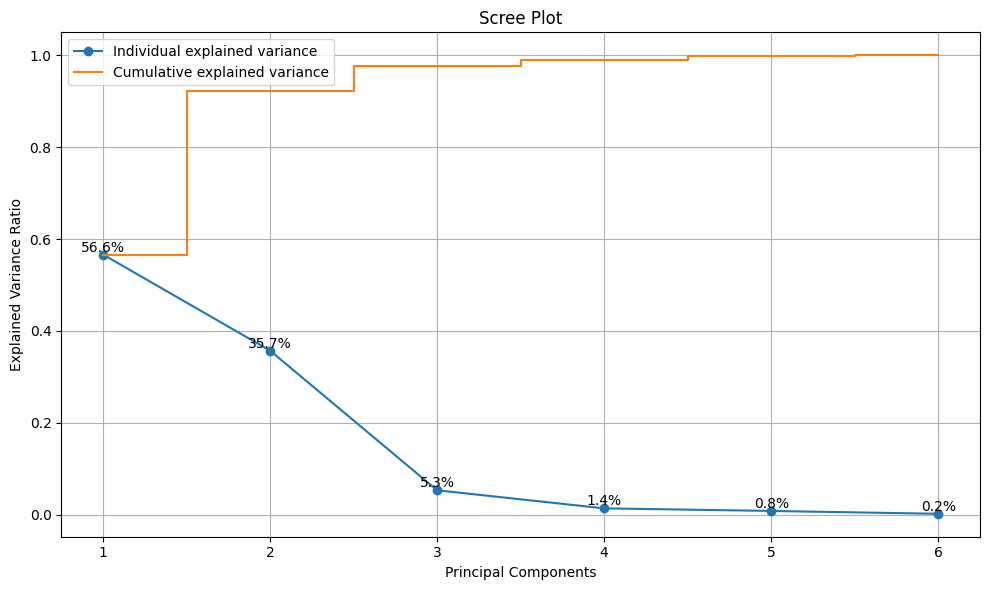

In [72]:
pca_obj, transformed_data, variance_ratio = perform_pca_analysis(df_num.values)

